In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data=pd.read_csv(r"C:\Users\User\Desktop\Neural Network\train.csv\train.csv")


In [65]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.



In [66]:
X_dev.shape

(784, 1000)

In [67]:
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [ ]:
import numpy as np

def init_params():
    # Xavier Initialization
    W1 = np.random.randn(10, 784) * np.sqrt(2 / 784)
    b1 = np.zeros((10, 1))
    W2 = np.random.randn(10, 10) * np.sqrt(2 / 10)
    b2 = np.zeros((10, 1))
    W3 = np.random.randn(10, 10) * np.sqrt(2 / 10)
    b3 = np.zeros((10, 1))
    return W1, b1, W2, b2, W3, b3

def ReLu(Z):
    return np.maximum(0, Z)

def softmax(Z):
    exp_Z = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)

def forward_prop(W1, b1, W2, b2, W3, b3, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLu(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = ReLu(Z2)
    Z3 = W3.dot(A2) + b3
    A3 = softmax(Z3)
    return Z1, A1, Z2, A2, Z3, A3

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y, num_classes=10):
    one_hot_Y = np.zeros((num_classes, Y.size))
    one_hot_Y[Y, np.arange(Y.size)] = 1
    return one_hot_Y


def adam_optimizer(params, grads, v, s, t, beta1=0.9, beta2=0.999, epsilon=1e-8, alpha=0.001):
    
    if t == 1:  #
        for key in params:
            v[key] = np.zeros_like(params[key])
            s[key] = np.zeros_like(params[key])

    for key in params:
        
        v[key] = beta1 * v[key] + (1 - beta1) * grads["d" + key]  # Change grads[key] to grads["d" + key]
        s[key] = beta2 * s[key] + (1 - beta2) * (grads["d" + key] ** 2)

        
        v_corrected = v[key] / (1 - beta1 ** t)
        s_corrected = s[key] / (1 - beta2 ** t)

       
        params[key] -= alpha * v_corrected / (np.sqrt(s_corrected) + epsilon)
    
    return params, v, s


def backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y):
    m = X.shape[1]
    one_hot_Y = one_hot(Y)

    dZ3 = A3 - one_hot_Y
    dW3 = 1 / m * dZ3.dot(A2.T)
    db3 = 1 / m * np.sum(dZ3, axis=1, keepdims=True)

    dZ2 = W3.T.dot(dZ3) * ReLU_deriv(A2)
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(A1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)

    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2, "dW3": dW3, "db3": db3}
    return grads

def get_predictions(A3):
    return np.argmax(A3, axis=0)

def get_accuracy(predictions, Y):
    return np.mean(predictions == Y)

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2, W3, b3 = init_params()
    
    
    v = {
        "W1": np.zeros_like(W1), "b1": np.zeros_like(b1), 
        "W2": np.zeros_like(W2), "b2": np.zeros_like(b2), 
        "W3": np.zeros_like(W3), "b3": np.zeros_like(b3)
    }
    s = {
        "W1": np.zeros_like(W1), "b1": np.zeros_like(b1), 
        "W2": np.zeros_like(W2), "b2": np.zeros_like(b2), 
        "W3": np.zeros_like(W3), "b3": np.zeros_like(b3)
    }
    t = 0  
    
    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
        grads = backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y)
        
        t += 1  # Update time step
        
        
        params = {"W1": W1, "b1": b1, "W2": W2, "b2": b2, "W3": W3, "b3": b3}
        params, v, s = adam_optimizer(params, grads, v, s, t, alpha=alpha)
        
       
        W1, b1, W2, b2, W3, b3 = params["W1"], params["b1"], params["W2"], params["b2"], params["W3"], params["b3"]
        
        if i % 10 == 0:
            predictions = get_predictions(A3)
            print(f"Iteration {i}: Accuracy = {get_accuracy(predictions, Y)}")
    
    return W1, b1, W2, b2, W3, b3

W1, b1, W2, b2, W3, b3 = gradient_descent(X_train, Y_train, alpha=0.001, iterations=500)




Iteration 0: Accuracy = 0.0883170731707317
Iteration 10: Accuracy = 0.20824390243902438
Iteration 20: Accuracy = 0.2832195121951219
Iteration 30: Accuracy = 0.34219512195121954
Iteration 40: Accuracy = 0.3699268292682927
Iteration 50: Accuracy = 0.40070731707317075
Iteration 60: Accuracy = 0.4140243902439024
Iteration 70: Accuracy = 0.42541463414634145
Iteration 80: Accuracy = 0.45070731707317074
Iteration 90: Accuracy = 0.4882682926829268
Iteration 100: Accuracy = 0.5329756097560976
Iteration 110: Accuracy = 0.5799756097560975
Iteration 120: Accuracy = 0.6210487804878049
Iteration 130: Accuracy = 0.6457804878048781
Iteration 140: Accuracy = 0.6717804878048781
Iteration 150: Accuracy = 0.7073658536585365
Iteration 160: Accuracy = 0.7476341463414634
Iteration 170: Accuracy = 0.7889512195121952
Iteration 180: Accuracy = 0.8240975609756097
Iteration 190: Accuracy = 0.842170731707317
Iteration 200: Accuracy = 0.8516585365853658
Iteration 210: Accuracy = 0.8581707317073171
Iteration 220: Ac

In [71]:
def make_predictions(X, W1, b1, W2, b2,W3,b3):
    _,_,_, _, _, A3 = forward_prop(W1, b1, W2, b2,W3,b3, X)
    predictions = get_predictions(A3)
    return predictions

def test_prediction(index, W1, b1, W2, b2,W3,b3):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2,W3,b3)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [2]
Label:  2


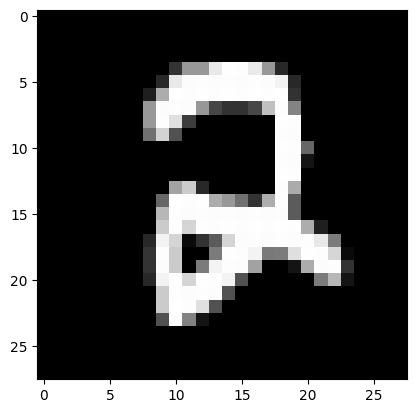

Prediction:  [0]
Label:  0


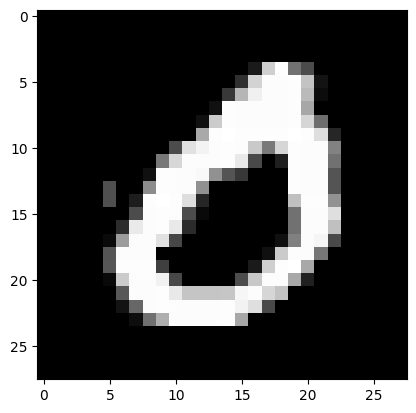

Prediction:  [9]
Label:  9


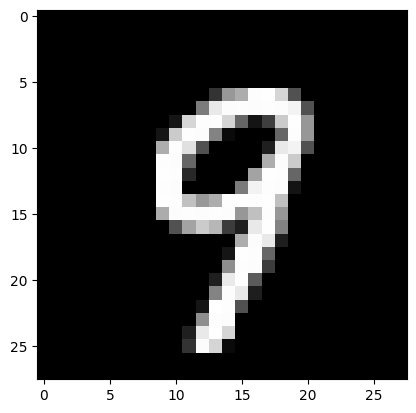

Prediction:  [3]
Label:  3


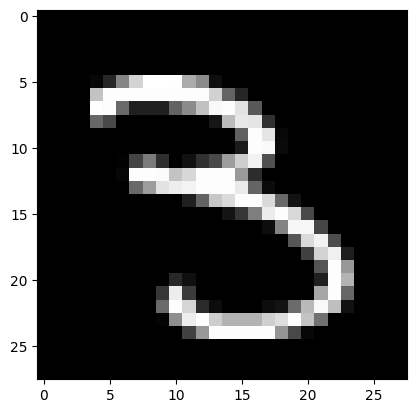

In [72]:
test_prediction(0, W1, b1, W2, b2,W3,b3)
test_prediction(1, W1, b1, W2, b2,W3,b3)
test_prediction(2, W1, b1, W2, b2,W3,b3)
test_prediction(3, W1, b1, W2, b2,W3,b3)

In [73]:
predictions__ = make_predictions(X_dev, W1, b1, W2, b2,W3,b3)
get_accuracy(predictions__, Y_dev)

0.922